In [1]:
from datetime import datetime as dt
import math
from string import Template

from IPython.display import display, YouTubeVideo, HTML, Image, Video
from IPython.core.interactiveshell import InteractiveShell

import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import datasets

# supporting code in python modules
import expStd
import baseVizBld

%matplotlib inline
sns.set(style="darkgrid")
plt.style.use('ggplot') 

In [2]:
#%lsmagic
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/Anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
    "theme": "simple",
    "start_slideshow_at": "selected",
    "scroll": True,  
    "slideNumber": True,
    "transition": "slide",
    "progress": True,
    "viewDistance": 5,
})

{'progress': True,
 'scroll': True,
 'slideNumber': True,
 'start_slideshow_at': 'selected',
 'theme': 'simple',
 'transition': 'slide',
 'viewDistance': 5}

# Advanced Analytics
## \#SquadGoals

<br>
<br>
<br>
<br>
<br>
Julia Romero         
AXA US       
Legacy Analytics

# Reference Info
All data presented here is synthetic and has been generated using:
- the dataset generation tools in [scikit learn](http://scikit-learn.org/stable/datasets/index.html#) 
- functions and random number generators 

All the code required to perform the examples presented here as well as the presentation itself can be found my a repo on [github](https://github.com/JuliaKR-10/seac_adv_analytics). The link is availible in the presentation documents shared

## Toolbox
Throughout the presentation I will include "toolbox" references highlighting the particular packages I'm using to do something. 

All of the examples today are written using [python 3](https://www.python.org/) I am presenting using a [jupyter notebook](https://jupyter.org/) and the [RISE](https://github.com/damianavila/RISE) Reveal.js extension

+ Toolbox in front of each example with the additional python packages im using
+ Python
+ This whole presentation is in a Jupyter Notebook which means I was able to actually write and run the code for the examples from the presentation 
    - this is also why youre going to see code in my slides

## A note on data validation

# CRITICALLY IMPORTANT

### Just not a part of this talk

Since i made up the data we can safely assume that it passes validation

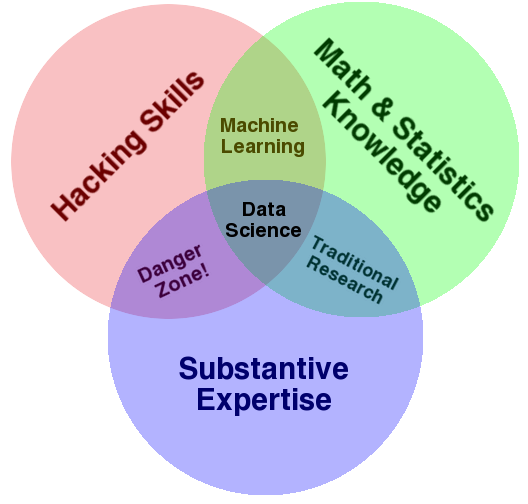

In [3]:
HTML( "<h1>That data science venn diagram ...</h1>")
Image("https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png")

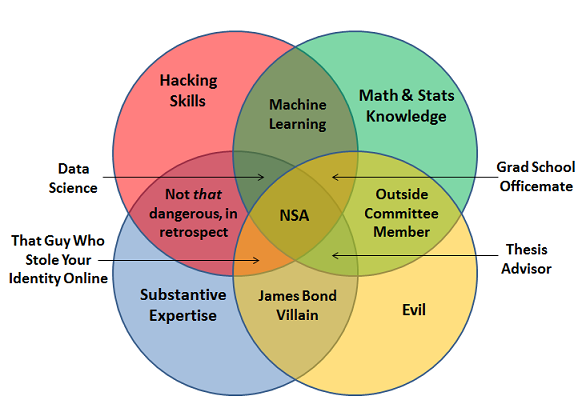

In [4]:
HTML("<h1>I like this one better</h1>")
Image("https://3.bp.blogspot.com/-bvQxcwfqATQ/V-E_uTBc4VI/AAAAAAAAMGQ/Qa1Ntef-rs0E-mWx5pkVu-CPlREdvD0TwCLcB/s1600/VennDiagram2.png")

In [5]:
HTML("<h1> ... so why are we here today?</h1><br>")

# Move from hype to can
**My goal today is for you to leave this room *knowing* that you can head back to your offices on Monday and with a few emails have an analytics project up and running**

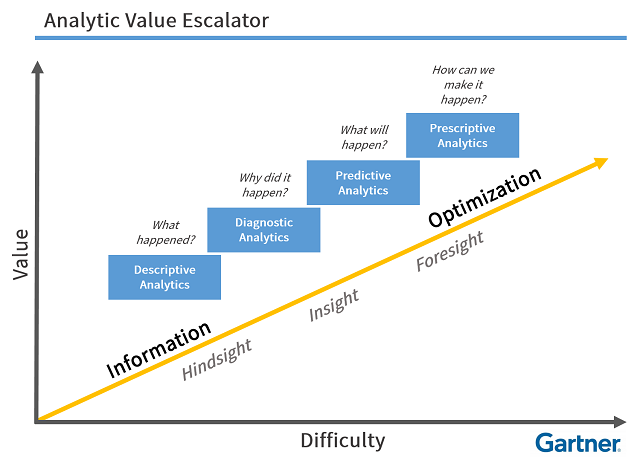

In [6]:
HTML("<h1>One more chart you've seen before</h1><br>")
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

in this talk i'll be going through an example of each of these "types" of analytics and showing you how working as a team enables you to climb these stairs 

# Descriptive Analytics

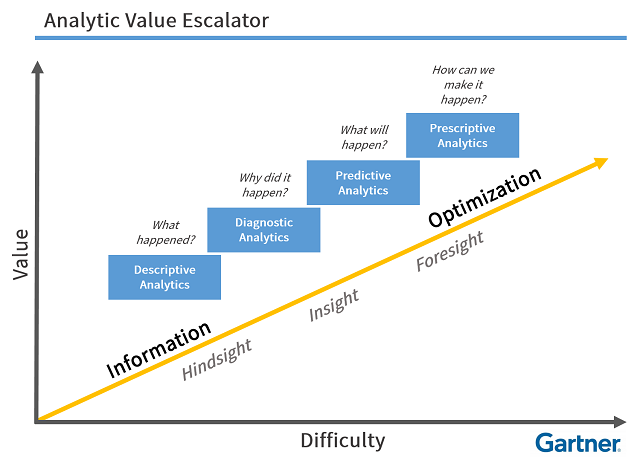

In [3]:
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

## Toolbox
- numpy
- pandas
- matplotlib

## How was the data made
Make a dataset that emulates lapse experience for a savings product with cash value and surrender charges
1. Specify generating functions 
2. Simulate synthetic population 
3. Simulate observations 

### Decrement function
$$ x = b_0 + b_1(YrsToChargeFree) + b_2(YrsToChargeFree)\times(AmtCharge) + \sigma$$
$$prob(dec) =\dfrac{e^{x}}{1+e^{x}}$$

### Synthetic population
Randomly specify:
1. class - {'A':0.20, 'B':0.35, 'C':0.15,'D':0.30}
   - A: 1 yrs
   - B: 4 yrs
   - C: 8 yrs
   - D: 10 yrs
2. account value [5000, 10000000]
3. yrs left 

Let
- $charge = \dfrac{yrsLeft}{(totalYrs \times 10)}$
- $amtCharg = accountValue \times charge$

### Simulate observations 
1. Specify b values
2. define function that calculates probability 
3. apply function to population
4. loop through population simulate decrement with random draw

In [7]:

def chargePlt(df, chrgYrs):
    ttl = Template('$n year charge')
    
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (16,10))
    fig.suptitle('Actual versus Expected Lapse Rates', fontsize = 16)
    ax1, ax2, ax3, ax4 = axes.ravel()
    
    ax1.set_title(ttl.substitute(n=chrgYrs[0]))
    line1, = ax1.plot(df.xs(chrgYrs[0],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax1.plot(df.xs(chrgYrs[0],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax1.legend(loc='upper right')
    
    ax2.set_title(ttl.substitute(n=chrgYrs[1]))
    line1, = ax2.plot(df.xs(chrgYrs[1],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax2.plot(df.xs(chrgYrs[1],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax2.legend(loc='upper right')
    
    ax3.set_title(ttl.substitute(n=chrgYrs[2]))
    line1, = ax3.plot(df.xs(chrgYrs[2],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax3.plot(df.xs(chrgYrs[2],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax3.legend(loc='upper right')
    
    ax4.set_title(ttl.substitute(n=chrgYrs[3]))
    line1, = ax4.plot(df.xs(chrgYrs[3],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax4.plot(df.xs(chrgYrs[3],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax4.legend(loc='upper right')
    

    ax1.set_xlabel('duration')
    ax2.set_xlabel('duration')
    ax3.set_xlabel('duration')
    ax4.set_xlabel('duration')
    
    ax1.set_ylabel('rate')
    ax2.set_ylabel('rate')
    ax3.set_ylabel('rate')
    ax4.set_ylabel('rate')
    
    plt.show()

In [8]:

# good fit - simulate directly against expected
synthExp_gf = expStd.process_synthExp(expStd.buildSynthPop(10000, 5000, 1000000, 1, 20,0))

# not good fit - add distortion to simulation 
synthExp_ngf = expStd.process_synthExp(expStd.buildSynthPop(10000, 5000, 1000000, 1, 20,0.1))

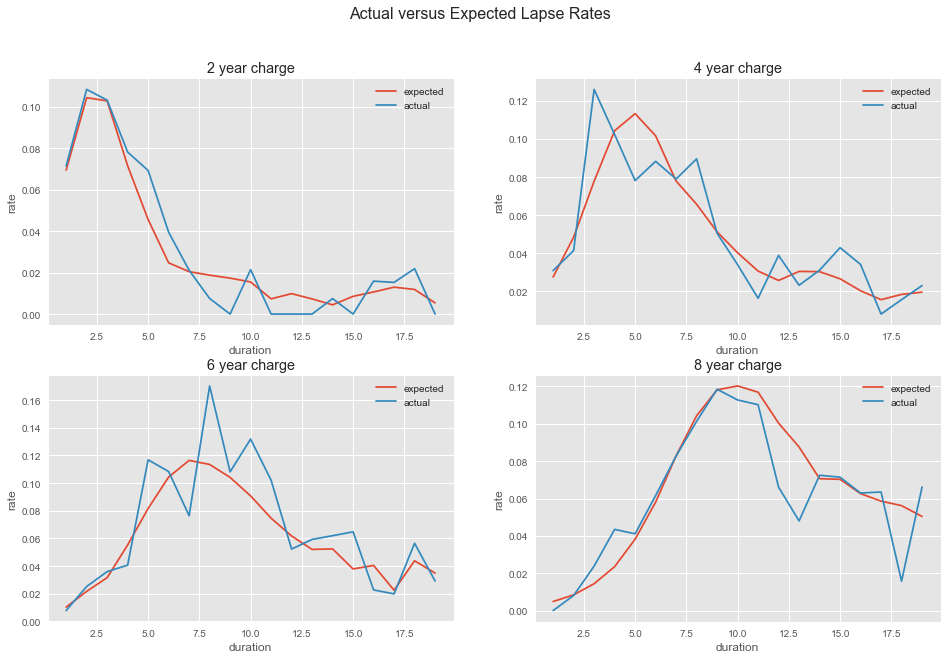

In [9]:
chargePlt(synthExp_gf, ['2','4','6','8']) 

# Actuaries have been using advance analytics for a long time... we just called it experience

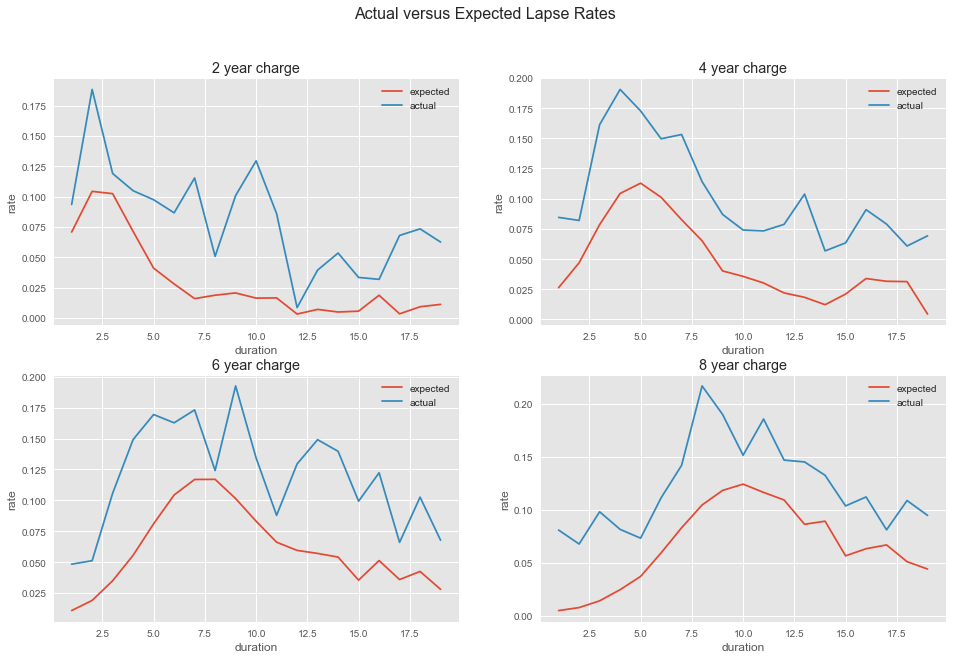

In [10]:
chargePlt(synthExp_ngf, ['2','4','6','8'])

In [11]:
# freeing some space
synthExp_gf = 0
synthExp_ngf = 0

# OK fine, but how about something a bit more... 


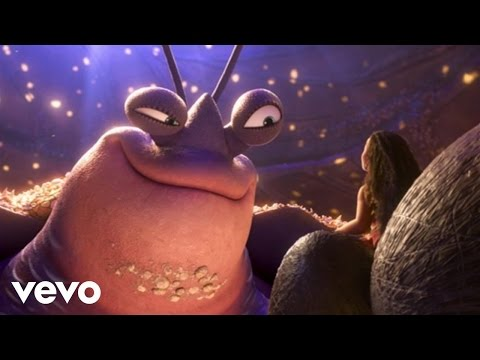

In [8]:
vid = YouTubeVideo("93lrosBEW-Q", start=27, end =40, width = 1067, height = 600, autoplay=0)
display(vid)

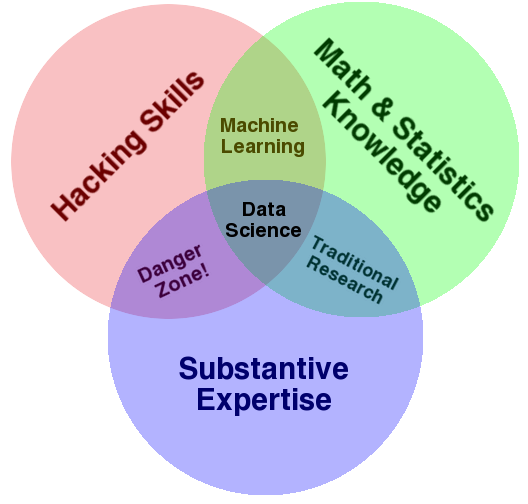

In [10]:
HTML("<h2>Remember our trusty old venn diagram</h2><br>")
Image("https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png")

### This can be a *team*

# Diagnostic Analytics

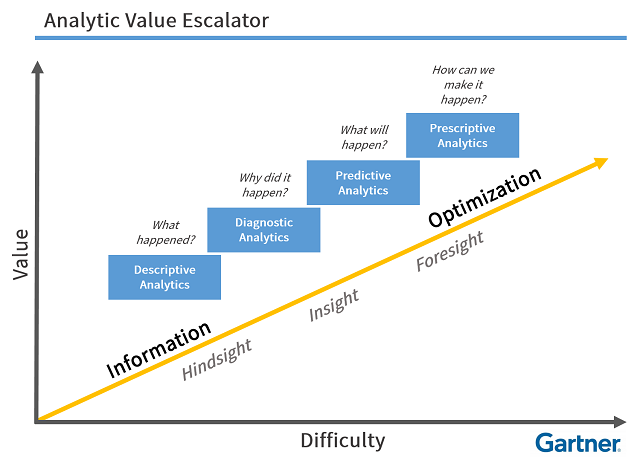

In [4]:
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

# The actuary & the hacker 

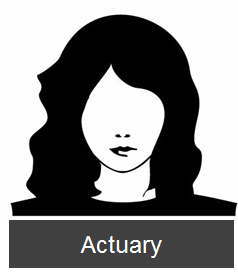

In [14]:
HTML("<h3>Actuaries understand product features and the drivers of risk and value</h3> <br>")
Image("images/julia_icon.png")

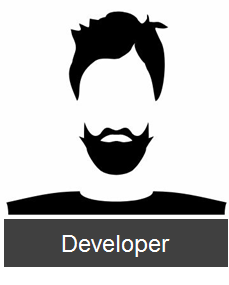

In [15]:
HTML("<h3> \"Hackers\" (we'll call them developers from now on) bring a new perspective on how to process and represent data </h3><br>")
Image("images/eric_icon.png")


In [15]:
import matplotlib.patches as mpatches

def buildFullPremPlt(df):
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (16,10))
    axes.set_title("Transactions")
    axes.set_xlabel('date')
    axes.set_ylabel('policy')    
    return plt.plot_date(x = df.trxDt, y = df.polNo, marker = ',', color = 'green')

def buildIndPremPlt(df1, df2):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (16,10), sharex=True)
    fig.suptitle('Transactions Split by Industry', fontsize = 16)

    ax1, ax2 = axes.ravel()   
    ax1.set_title("Education")
    ax2.set_title("Other")
    ax1.set_xlabel('date')
    ax2.set_xlabel('date')
    ax1.set_ylabel('policy')    
    ax2.set_ylabel('policy')    

    ax1.plot_date(x = df1.trxDt, y = df1.polNo, marker = ',', color = 'green')
    ax2.plot_date(x = df2.trxDt, y = df2.polNo, marker = ',', color = 'green')
    
    return fig, axes

def bldTypePlt(df, title, ax):
    ax.set_title(title)
    ax.set_xlabel('date')
    ax.set_ylabel('policy')
    
    ax.plot_date(x = df[df['premType']=='auto']['trxDt'], 
                  y = df[df['premType']=='auto']['polNo'], 
                  marker = ',', color = 'yellow', label = 'auto')
    yellow_patch = mpatches.Patch(color='yellow', label='Automatic')
    
    ax.plot_date(x = df[df['premType']=='adhoc']['trxDt'], 
                  y = df[df['premType']=='adhoc']['polNo'], 
                  marker = ',', color = 'c', label = 'adhoc')
    green_patch = mpatches.Patch(color='c', label='Ad Hoc')
    
    ax.plot_date(x = df[df['premType']=='rollover']['trxDt'], 
                  y = df[df['premType']=='rollover']['polNo'], 
                  marker = ',', color = 'm', label = 'rollover')
    blue_patch = mpatches.Patch(color='m', label='Rollover')
    
    ax.plot_date(x = df[df['premType']=='termination']['trxDt'], 
                  y = df[df['premType']=='termination']['polNo'], 
                  marker = ',', color = 'k', label = 'termination')
    red_patch = mpatches.Patch(color='k', label='Termination')
    
    ax.legend(handles = [yellow_patch, green_patch, blue_patch, red_patch], loc='upper left')
    
    return ax
    
def bldIndTypePlt(df1, df2):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (16,10), sharex=True)
    fig.suptitle('Transactions Split by Industry and Type', fontsize = 16)

    ax1, ax2 = axes.ravel()   
    
    ax1 = bldTypePlt(df1, "Education", ax1)
    ax2 = bldTypePlt(df2, "Other", ax2)
    return fig, axes

In [4]:
if(False):
    est = baseVizBld.buildRetPop(1500, pd.Timestamp('2002-01-01'),pd.Timestamp('2003-07-01'))
    trxes = baseVizBld.buildTrx(est)
    est.to_csv('data/premEx_pop.csv')
    trxes.to_csv('data/premEx_trx.csv')
else:
    est = pd.read_csv('data/premEx_pop.csv')
    trxes = pd.read_csv('data/premEx_trx.csv')

In [5]:
if(False):
    eduTrx = trxes.drop(trxes[trxes['educInd']==False].index, inplace = False)
    otherTrx = trxes.drop(trxes[trxes['educInd']==True].index, inplace = False)
else:
    eduTrx = trxes[trxes['educInd']==True]
    otherTrx = trxes[trxes['educInd']==False]

# Visualization is the most important tool in applied analytics

## How does this relate to "advanced analytics"?

+ Visualization is the fastest way to communicate and understand large datasets
+ Human beings are hard wired to process images 

![xkcd](https://imgs.xkcd.com/comics/self_description.png)
(Credit: XKCD)

## Blending the skill sets of actuaries and developers allows us to generate novel and compelling visualizations 

+ Actuaries  
    - Critical understanding of product and policyholder behaviors and features
    - First hand knowledge of existing experience datasources and structures
+ Devleopers 
    - Ability to manage and transform large datasets
    - Provide new approaches and fresh perspectives 

## Example: Qualified retirement savings product premium transactions 
### Objective question: Why have premium transactions per inforce policy been declining in the last two years?

So we are in diagnostic land - why is such and such happening. We havent been able to answer this question looking at the data in our traditional analyses so lets work with a hacker to dig more deeply into the data - in fact we aren't going to do any aggregation at all!

## Toolbox
- numpy
- pandas
- matplotlib

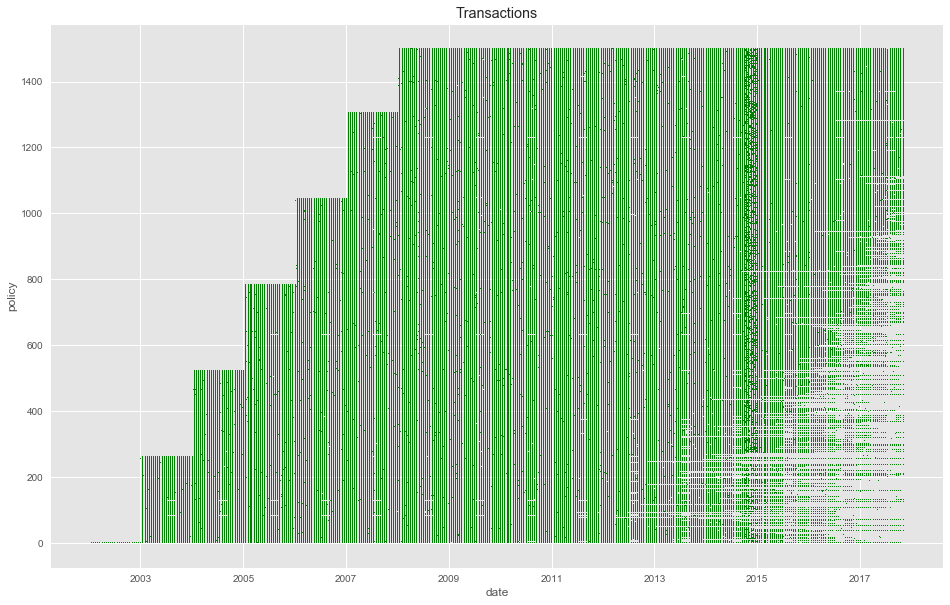

In [8]:
buildFullPremPlt(trxes)

We are building a pixel plot
- x-axis is time
- y-axis is contract issue number
- pixel is a transaction

What are we seeing
- policies are issued at the start of the year
- surge at a point
- trailing off but wouldnt those not be inforce ...
- regular gaps for some people

(<matplotlib.figure.Figure at 0x11e3b828>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F602B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012FBD8D0>], dtype=object))

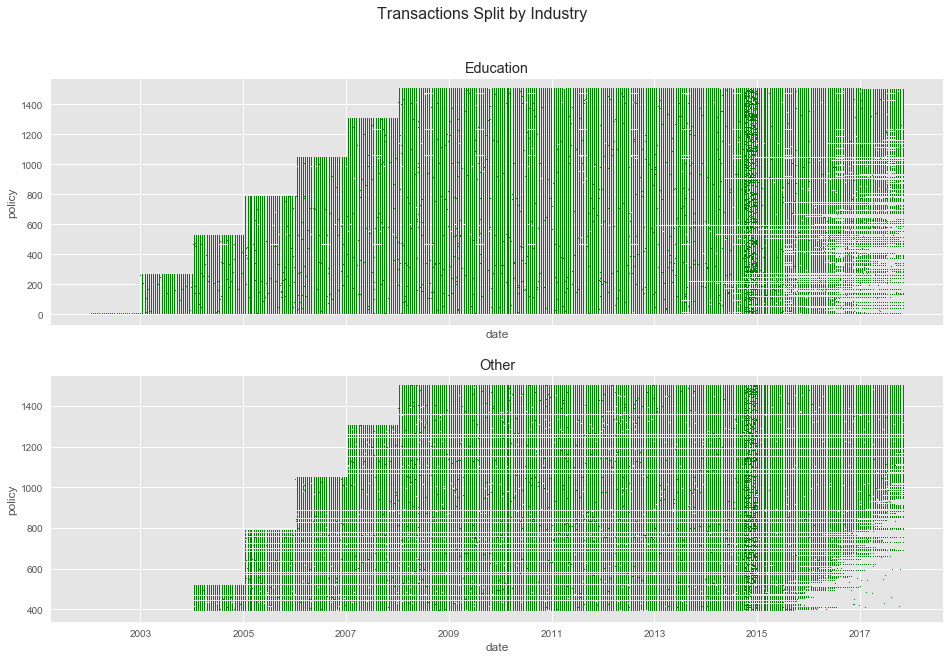

In [16]:
buildIndPremPlt(eduTrx, otherTrx)

### What do we learn from the split by industry 
- That weird pattern is only for education
- "Other" was a added as new market and it seems to have canabalized some sales, but not a majority 
- seems like there is some difference in the surge thing
- "Other" seems less consistent, more gaps in contribution stream

### Decline recently 
The contribution period of the "Other" group seems shorter, so there is an overlap in the contribution end dates for older education market and younger "Other" 

(<matplotlib.figure.Figure at 0x13ae7d68>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013ABFEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000142AA9B0>], dtype=object))

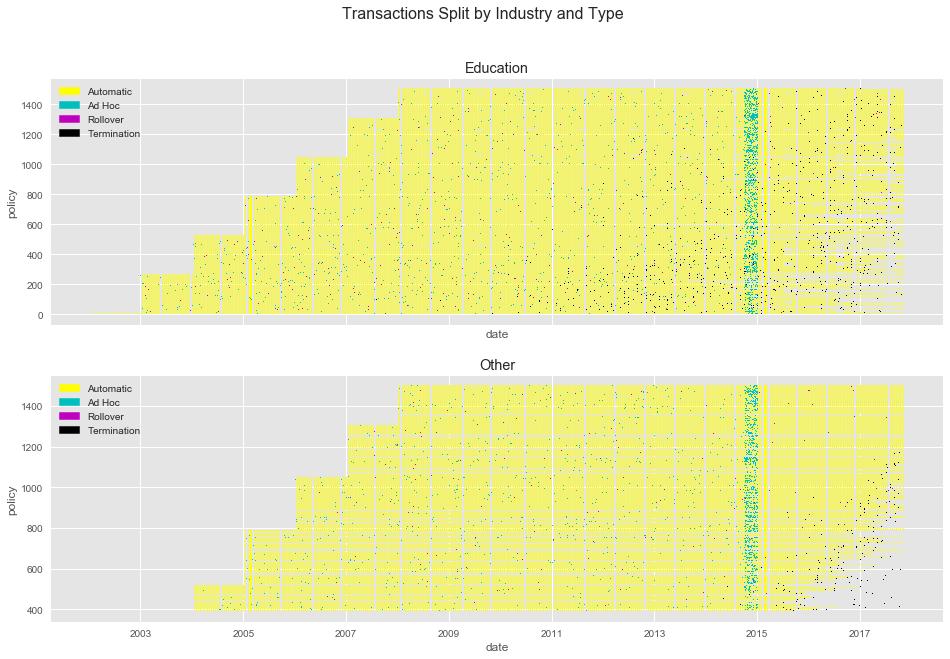

In [17]:
bldIndTypePlt(eduTrx,otherTrx)

Same plot but
- yellow is the pay check deductions 
- cyan is ad hoc
- magenta is rollover 
- black is termination 


## The actuary and the hacker help us diagnose the premium decline issue 

So by working with a developer we were able to view the data at a new level of detail which enabled us to discover that people retire and wait a while before moving their money

In [23]:
trxes = 0
est = 0
eduTrx = 0
otherTrx = 0

# Predictive Analytics

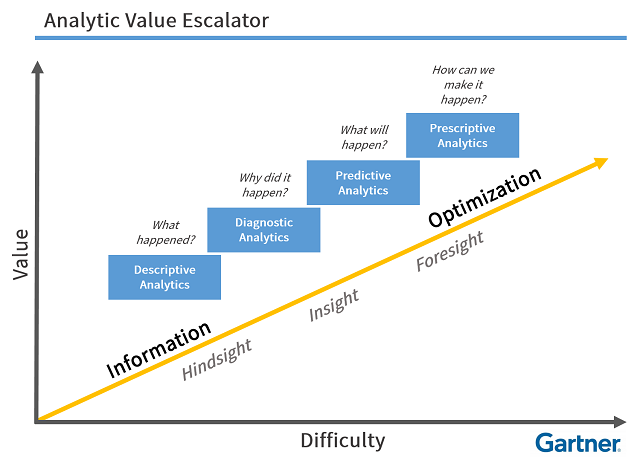

In [5]:
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

Predictive analytics certainly requires a level of competency in writing code and engineering and an understanding of the underlying probability, statistics, and credibility aspects to fitting and using a model. But those arent actually the hard parts - you can get there those are skills you can be taught easily. Whats hard about doing good predictive is figuring out what is worth predicting and how the prediction would fit into anything you do operationally - **that is why you need a business expert**

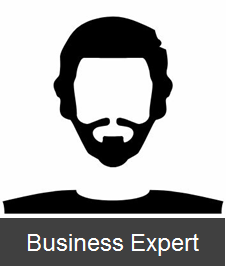

In [24]:
HTML("<h3>Adding a substantive expert in the business to your analytics team increases the team's ability to attack relevant business problems and provide on the ground actionable recomendations to end business users</h3>")
Image("images/rob_icon.png")

## Example: Expand life insurance sales in diabetes market

#### Business question: 
- Which potential clients have the best health / mortality outlooks? 
- Can we sell them life insurance?

#### Analytics questions:
- Can we use data to segment our potential client base to find areas where diabetes is "under control"?
- Can we predict applicants that will be better risks?

Imagine you work for a life insurer who sells a little bit in the diabetes market, but they'd like to know if we can expand our business. 

Want to be smart and capture people who are ok and have their disease under control - that is people who's diabetes progression is fairly flat year over year 

We have a data set on potential clients with diabetes and so our task is to try and build a model that would let us predict which potential clients will keep their diabetes under control and to whom we would sell 

## Toolbox
- numpy
- pandas
- matplotlib
- sklearn

In [18]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [19]:
diabetes = datasets.load_diabetes()
cols = ['age','sex','bmi','avg_bp','s1','s2','s3','s4','s5','s6']
diabetes_df = pd.DataFrame(diabetes.data, columns = cols)
diabetes_df['disease_status_t1'] = diabetes.target

## Data preperation

** Data Validation and Feature Engineering **

In [20]:
def cat_Status(scr):
    if(scr < 151):
        return 'A'
    elif(scr < 251):
        return 'B'
    else:
        return 'C'

In [21]:
diabetes_df['age_sex_cross'] = diabetes_df.age * diabetes_df.sex
diabetes_df['diseaseStatus_cat'] = diabetes_df.apply(lambda x: cat_Status(x.disease_status_t1), axis = 1)

In [22]:
xdata = diabetes_df.drop(['disease_status_t1', 'diseaseStatus_cat'], axis =1)
ydata = diabetes_df[['disease_status_t1', 'diseaseStatus_cat']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.3, random_state = 0)

## Build the model

### Model selection

Lets limit our discussion to supervised models here 

** Describe what you are trying to predict **
- category 
- value

** What are you going to do with your predictions? **

- false negative vs false positive - are they the same
- do your users need to understand the process
- do you need to attribute the impact of each feature

### K-nearest Neighbors
- Supervised classification model
- "Looks like"

In [24]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
clf =  neighbors.KNeighborsClassifier(15, weights='uniform')

### Feature selection
** What goes in the model?**

In [25]:
HTML("<h4>Correlation matrix</h4>")
diabetes_df.corr().style

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,disease_status_t1,age_sex_cross
age,1,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889,-0.0285763
sex,0.173737,1,0.0881614,0.241013,0.0352768,0.142637,-0.37909,0.332115,0.149918,0.208133,0.043062,0.0224381
bmi,0.185085,0.0881614,1,0.395415,0.249777,0.26117,-0.366811,0.413807,0.446159,0.38868,0.58645,-0.0605078
avg_bp,0.335427,0.241013,0.395415,1,0.24247,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484,-0.0725035
s1,0.260061,0.0352768,0.249777,0.24247,1,0.896663,0.0515194,0.542207,0.515501,0.325717,0.212022,-0.116381
s2,0.219243,0.142637,0.26117,0.185558,0.896663,1,-0.196455,0.659817,0.318353,0.2906,0.174054,-0.0753236
s3,-0.075181,-0.37909,-0.366811,-0.178761,0.0515194,-0.196455,1,-0.738493,-0.398577,-0.273697,-0.394789,-0.0392564
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1,0.617857,0.417212,0.430453,-0.0461077
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1,0.46467,0.565883,-0.0986936
s6,0.301731,0.208133,0.38868,0.390429,0.325717,0.2906,-0.273697,0.417212,0.46467,1,0.382483,-0.0825197


### Train the model!

Teach the model how to predict what we want it to predict

In [26]:
clf.fit(X_train[['s5','bmi','s4']], y_train['diseaseStatus_cat'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

# Model Validation 

## Sidebar: What is model validation and why should we do it?

Split the dataset and pick a metric

## Data validation generally 
Actuaries are often really against not using all the data. I remember early on building a model to predict clients who were likely to make a subsequent contribution and i used a hold out of 20% and all i got from my actuarial collegues was "but youre going to retrain it with all the data before you deploy right?" I think this comes from a good place where we want to be as precise as possible and we feel like more is better but flying blind is bad!

#### What
Model validation is splitting your dataset so that you dont use the same observations that you used to teach the model to test how well it performs. Imagine if the practice problems for exams were actually on the next exam! 

Train-test vs train-test-final

#### Why
1. test your model performance on fresh data - like if the practice questions were actually on the exam
2. overfitting - capture the specifics of a certain part of the data set but you cant generalize 

So you can see how well your model did

In [27]:
import itertools
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def buildConfusionMatrix(cm, classes, ax,
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Blues
                        ):
    
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [28]:
class_names = ['A','B','C']
cm_train = confusion_matrix(y_train['diseaseStatus_cat'],clf.predict(X_train[['s5','bmi','s4']]))
cm_test = confusion_matrix(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]))
np.set_printoptions(precision=2)

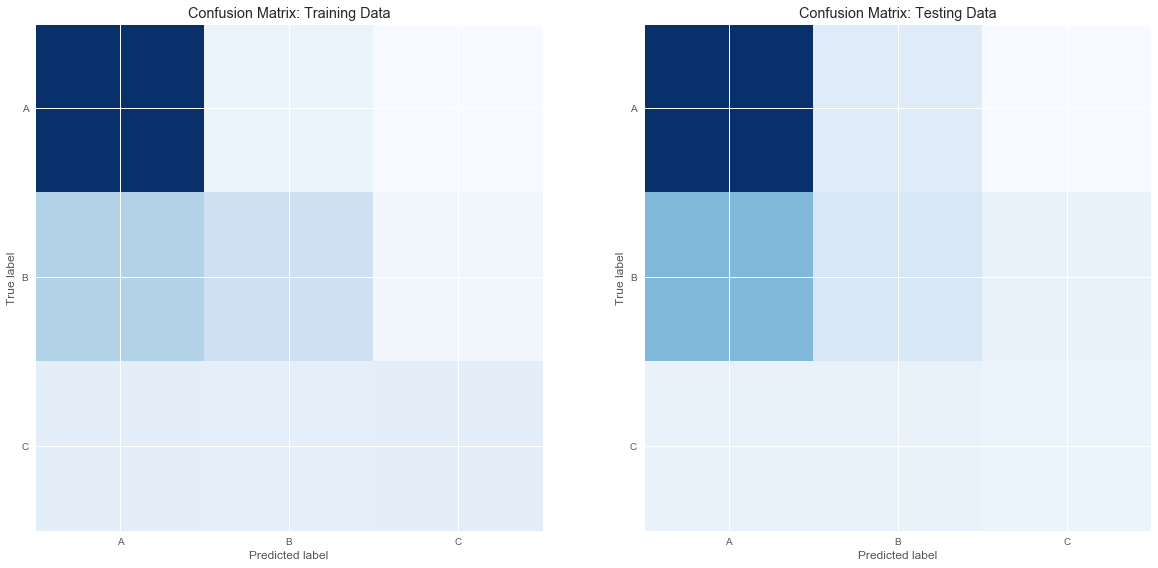

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (20,16))
ax1, ax2 = axes.ravel()

buildConfusionMatrix(cm_train, classes = class_names, ax = ax1, title = 'Confusion Matrix: Training Data')
buildConfusionMatrix(cm_test, classes = class_names, ax = ax2, title = 'Confusion Matrix: Testing Data')

## What are we doing in this example

Confusion matrix and precision and recall

Confusion matrix - shows you what your model predicted versus what the true result was (i'm going to show it with a heat map so darker = more observations), your aiming to see the darkest running in a line from the upper left to the lower right

Precision and recall 
- precision is the ratio of true true over predicted true - gets at false positives
- recall is the ration of true true to all real true - gets at false negatives 

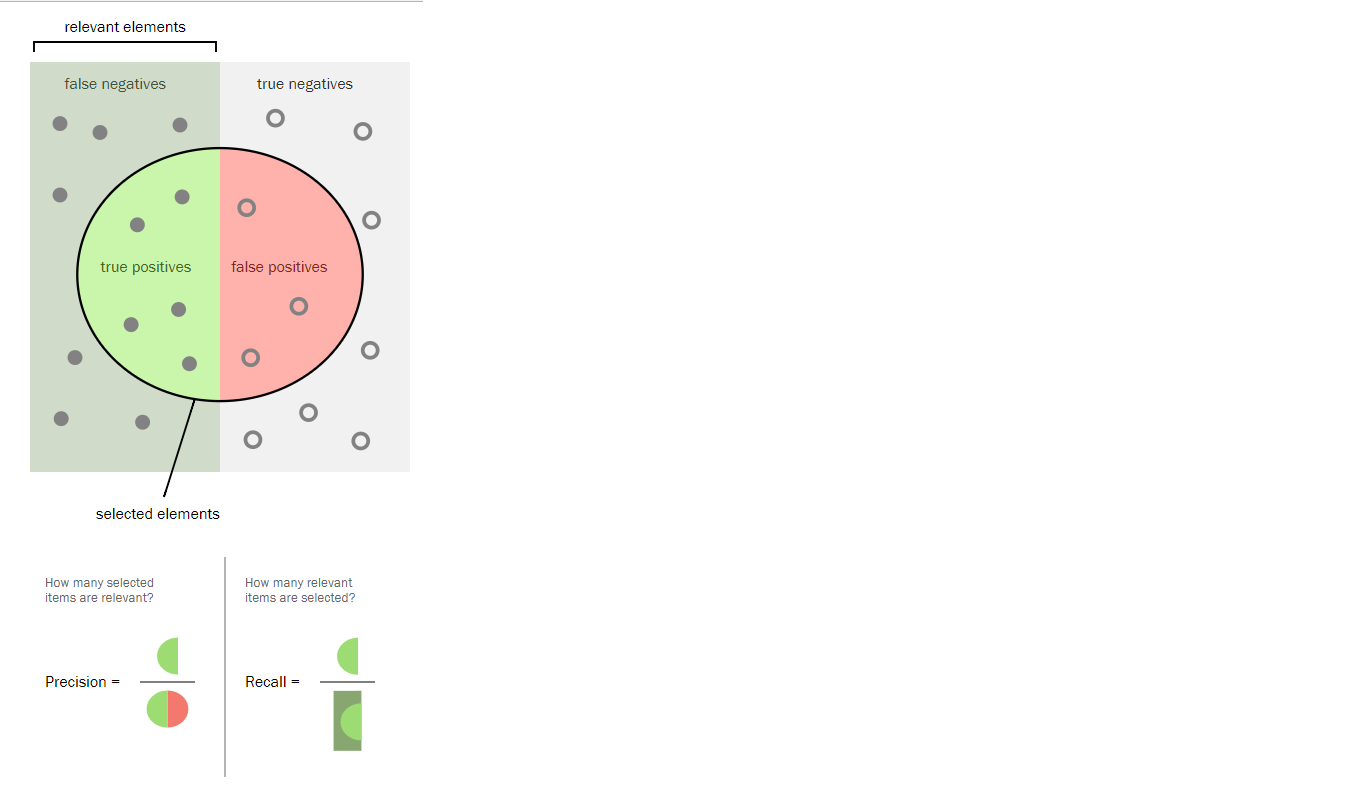

In [30]:
Image("images/precision_recall.png")
HTML("By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283")

In [31]:
from sklearn.metrics import precision_score, recall_score
'Precision: {0:%} Recall: {1:%}'.format(
    precision_score(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]), average = 'weighted'),
    recall_score(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]), average = 'weighted'))

'Precision: 53.305317% Recall: 57.142857%'

# The process is iterative!

- Explore different models
- Explore features
- Engineer new features
- Enrich your dataset

### Use business expertise
Our business expert tells us that, underwriters and physicians view blood pressure as a very good predictor of how well a person is managing their overall health 

In [32]:
HTML("<h2>Add BP to the predictors!</h2>")
clf2 =  neighbors.KNeighborsClassifier(15, weights='uniform')
clf2.fit(X_train[['s5','bmi','s4','avg_bp']], y_train['diseaseStatus_cat'])

cm_train = confusion_matrix(y_train['diseaseStatus_cat'],clf2.predict(X_train[['s5','bmi','s4','avg_bp']]))
cm_test = confusion_matrix(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

## Yes I know... explanatory variables are not free!

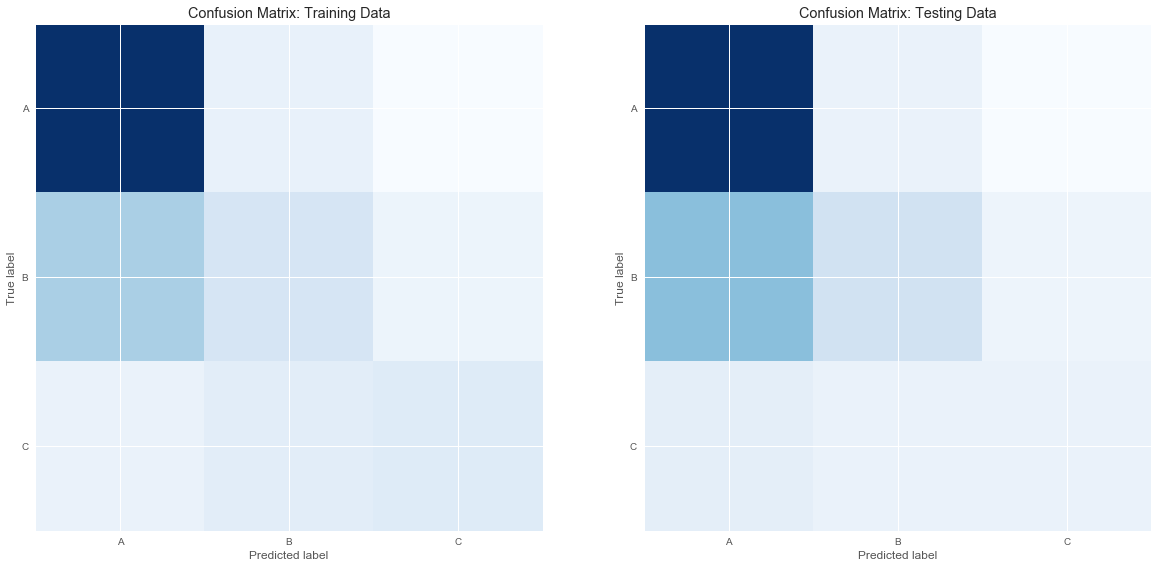

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (20,16))
ax1, ax2 = axes.ravel()

buildConfusionMatrix(cm_train, classes = class_names, ax = ax1, title = 'Confusion Matrix: Training Data')
buildConfusionMatrix(cm_test, classes = class_names, ax = ax2, title = 'Confusion Matrix: Testing Data')

In [34]:
from sklearn.metrics import precision_score, recall_score
'Precision: {0:%} Recall: {1:%}'.format(
    precision_score(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]), average = 'weighted'),
    recall_score(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]), average = 'weighted'))

'Precision: 60.214122% Recall: 62.406015%'

## Predictive analytics requires math, coding, and an understanding of business problems 

# Prescriptive analytics and beyond

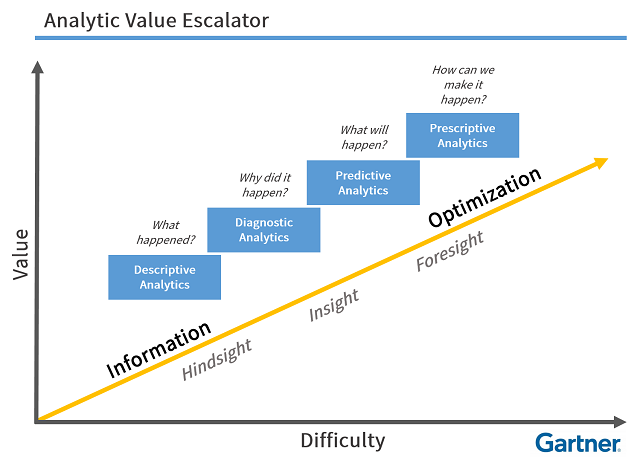

In [6]:
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

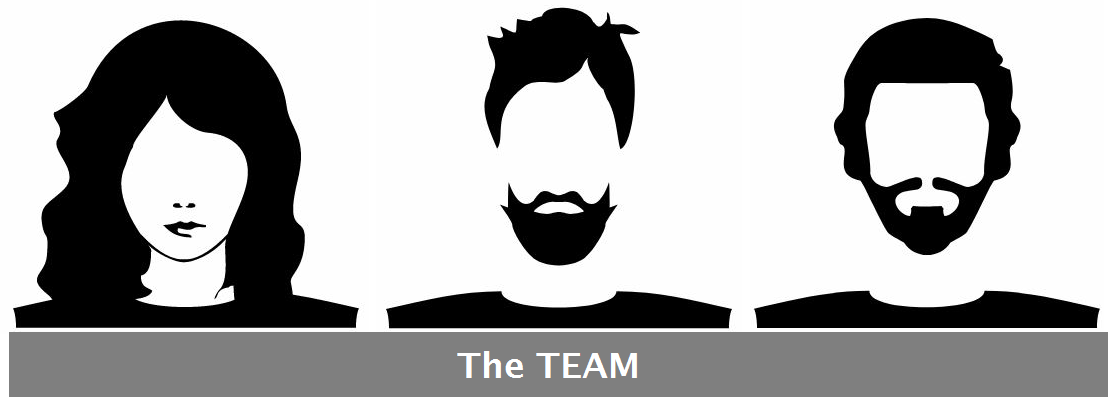

In [4]:
HTML("<h3>Good prescriptive analytics requires a skilled and effective analytics team </h3>")
Image("images/analyticsteam.png")

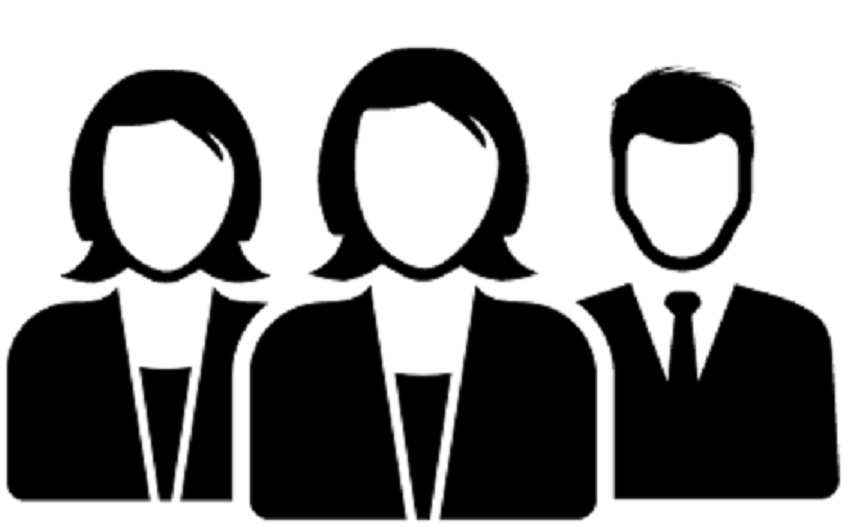

In [35]:
HTML("<h3>... it also requires allies</h3>")
Image("images/allies.png")

# Prescriptive Analytics Models
- Extension of predictive models
- Artificial or augmented intelligence 
- System dynamics or agent based models
- ...

# Agent Based Simulation Models (ABMs) 

## What is an agent based model?

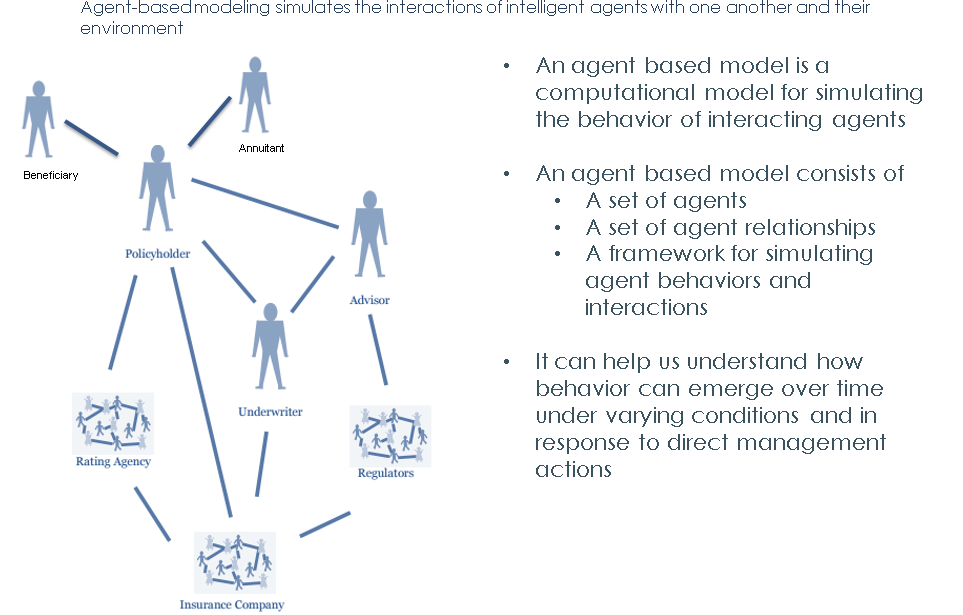

In [7]:
Image("images/ABMs.png")

Digging into these "why" questions requires a deep expertise around the business and behavior where the actuary and the business person need to work together and even draw on external resources to develop the mental model

... and then you have to take your mental model and put it into code, and brother you better believe that these things take chops and you have to get in and engineer and problem solve together

## What do you do with an agent based model?

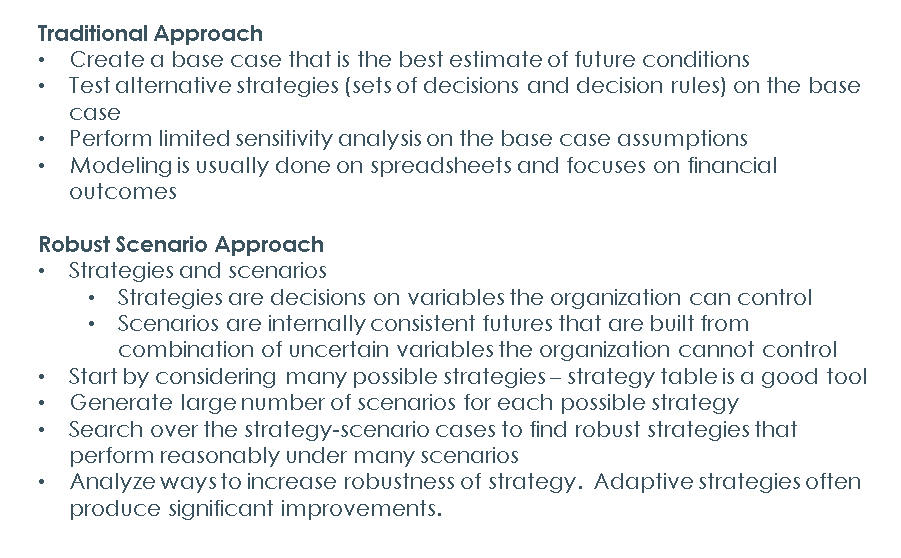

In [8]:
Image("images/usingABMs.png")

Again
- you need to understand the business context to figure out what is worth testing 
- you need the developer to help you engineer the tests in to your code
- you need an actuary to interpret the results 
...and you all have to be working together like a finely tuned machine because these things are too complex for one skill set to handle on their own

## When does it make sense to use an agent based model?

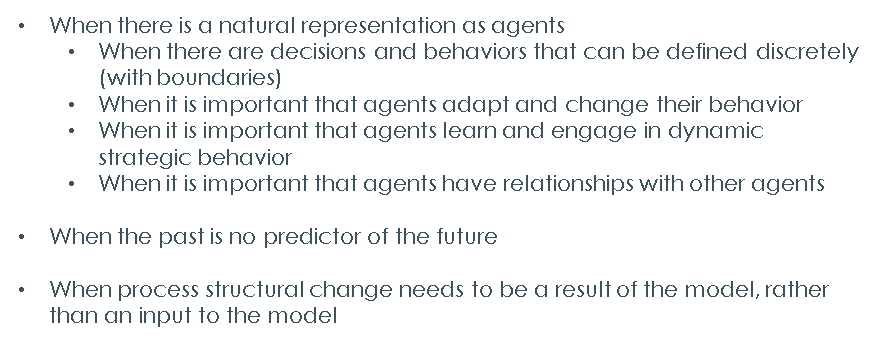

In [9]:
Image("images/whenABM.png")

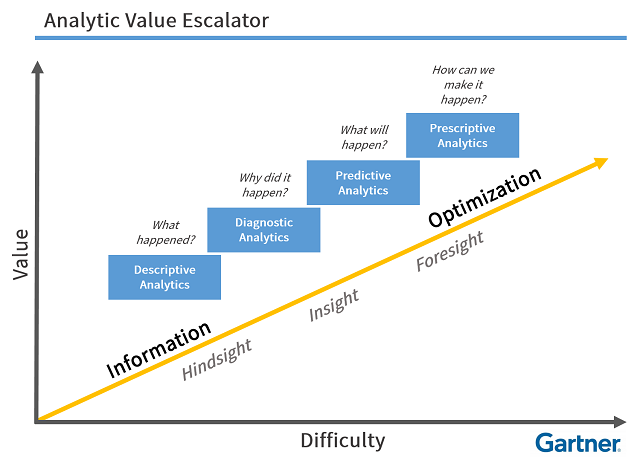

In [36]:
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

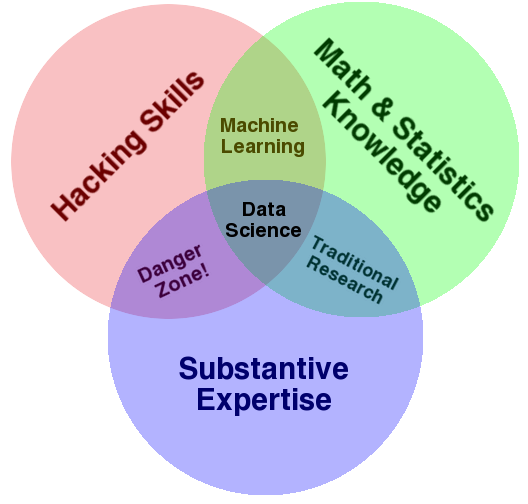

In [10]:
Image("https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png")

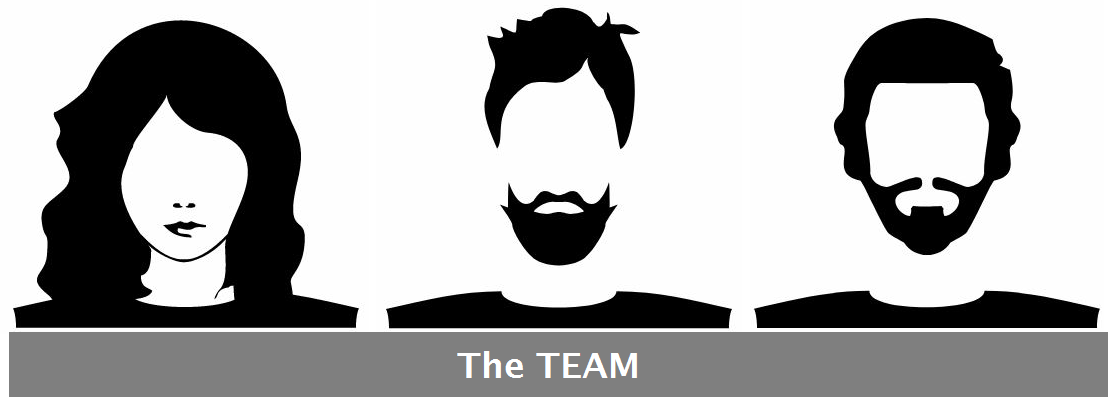

In [11]:
Image("images/analyticsteam.png")

# <center>Thank you</center>